<a href="https://colab.research.google.com/github/Mansihpatel/DeepLearning/blob/main/Gradient_Descent_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent for Nueral Network



In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [95]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2,random_state = 21)

In [97]:
len(X_train)

22

In [98]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100


In [99]:
X_train_scaled

,age,affordibility
19,0.18,1
11,0.28,1
25,0.54,1
0,0.22,1
18,0.19,0
6,0.55,0
27,0.46,1
13,0.29,0
12,0.27,0
26,0.23,1


In [100]:
model = keras.Sequential([keras.layers.Dense(1, input_shape=(2,), activation ='sigmoid', 
                                             kernel_initializer='ones', bias_initializer ='zeros')
])



In [101]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [102]:

model.fit(X_train_scaled,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 6ms/step - loss: 0.5359 - accuracy: 0.7727
Epoch 2502/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5359 - accuracy: 0.7727
Epoch 2503/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5359 - accuracy: 0.7727
Epoch 2504/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5358 - accuracy: 0.7727
Epoch 2505/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5358 - accuracy: 0.7727
Epoch 2506/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5357 - accuracy: 0.7727
Epoch 2507/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5357 - accuracy: 0.7727
Epoch 2508/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5357 - accuracy: 0.7727
Epoch 2509/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5356 - accuracy: 0.7727
Epoch 2510/5000
1/1 [==============================] -

In [103]:
model.evaluate(X_test_scaled,y_test)


1/1 [==============================] - 0s 336ms/step - loss: 0.3870 - accuracy: 0.8333


[0.38703134655952454, 0.8333333134651184]

In [104]:
X_test_scaled

,age,affordibility
1,0.25,0
20,0.21,1
22,0.40,1
5,0.56,1
7,0.60,0
21,0.26,0


In [105]:
y_predicted = model.predict(X_test_scaled)

In [106]:
display(y_predicted,y_test)

array([[0.13749173],
       [0.381836  ],
       [0.60598195],
       [0.76828206],
       [0.4611081 ],
       [0.143285  ]], dtype=float32)

1     0
20    0
22    1
5     1
7     1
21    0
Name: bought_insurance, dtype: int64

In [107]:
coef,intercept = model.get_weights()

In [108]:
coef,intercept

(array([[4.8011374],
        [1.5465637]], dtype=float32), array([-3.036565], dtype=float32))

#********************************* without Tensorflow  
once you have weigh and bias how prediction function work***************************

In [113]:
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))


In [114]:
def prediction_function(age,affordability):
  weighted_sum_y = coef[0]*age +coef[1]*affordability+intercept 
  return sigmoid(weighted_sum_y)

In [115]:
prediction_function(0.25,0)

0.13749176129263796

## Gradient decent without using Tensorflow 

In [109]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [110]:

def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [123]:
def gradient_descent(age,affordability,y_actual,epochs,loss_thresold):
    w1=w2=0
    bias =1
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1*age + w2*affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_actual,y_predicted)
        # update weights based on derivative function 
        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_actual))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_actual))
        bias_d = np.mean(y_predicted - y_actual)

        w1 = w1 - rate*w1d
        w2 = w2 - rate*w2d
        bias = bias - rate*bias_d

        print(f"Epoch:{i},w1:{w1},w2:{w2},Bias:{bias},loss:{loss}")
        if loss <= loss_thresold:
          break
      
    return w1,w2,bias
              


     
      


# Derivative function of weight and bias which we have used in above function

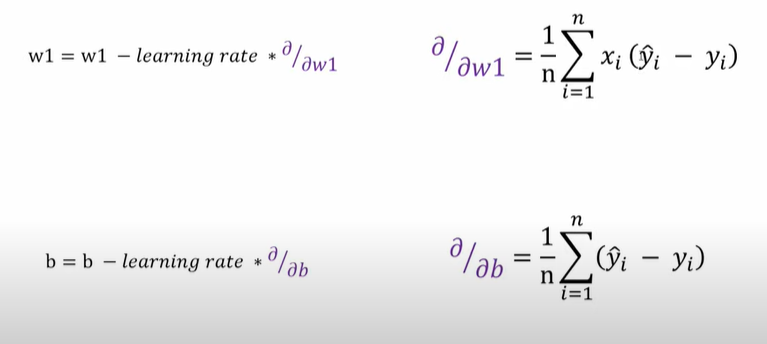

In [126]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,500,0.4631)

Epoch:0,w1:-0.022252517364107806,w2:-0.03856675586545632,Bias:0.8844707106849974,loss:0.8132616875182233
Epoch:1,w1:-0.0381139760014976,w2:-0.06500674714878364,Bias:0.7844638652149954,loss:0.7849787241946117
Epoch:2,w1:-0.04841782480805942,w2:-0.08096968804153726,Bias:0.6979821850664552,loss:0.7647788620250743
Epoch:3,w1:-0.054031262566763286,w2:-0.08817864457669009,Bias:0.622952012735378,loss:0.7502706486515087
Epoch:4,w1:-0.05577022852066192,w2:-0.08825607740899967,Bias:0.5574236482377294,loss:0.7396276915179818
Epoch:5,w1:-0.05435597922795494,w2:-0.08263501695210046,Bias:0.49967364388439095,loss:0.7315479233410794
Epoch:6,w1:-0.05040106872285896,w2:-0.07253038556550333,Bias:0.4482377669469297,loss:0.7251457899989964
Epoch:7,w1:-0.0444123494401444,w2:-0.058945029895330146,Bias:0.4019037695543535,loss:0.7198378853054265
Epoch:8,w1:-0.03680208012485075,w2:-0.04269219793580413,Bias:0.35968496947957346,loss:0.7152479134440846
Epoch:9,w1:-0.027901782604155906,w2:-0.024423528788593024,Bias

(4.584887755524995, 1.698611406102802, -3.099767076179343)

In [116]:
coef,intercept

(array([[4.8011374],
        [1.5465637]], dtype=float32), array([-3.036565], dtype=float32))

This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent 